# Classification Approch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)


## Work flow
0. [X] Clean and Engeering Data for X and y
1. [X] Split Data in Train/Test for X and y
2. [X] Scaler on Training X & X test
3. [X] Create Model(s)
4. [x] Fit/Train Model(s) on X Train
5. [x] Evaluate Model(s) on X test
6. [x] Adjust Param as Necessary
7. [X] Bonus: Save Model(s)

### PreProcess


#### Clean and Engeering Data

In [2]:
col_names=['Id','Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape',
          ' Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei',
           'Bland Chromatin','Normal Nucleoli', 'Mitoses','Class']
df = pd.read_csv('../breast-cancer-wisconsin.csv',
                 names=col_names)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4    Marginal Adhesion           699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
#Found Error in 'Bare nuclie'
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [5]:
 df['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [6]:
#Drop '?' duo to be less than 0.1 % of data(0.02)
df.drop(df[df['Bare Nuclei']  == '?'].index, inplace=True)
df.shape

(683, 11)

<Axes: >

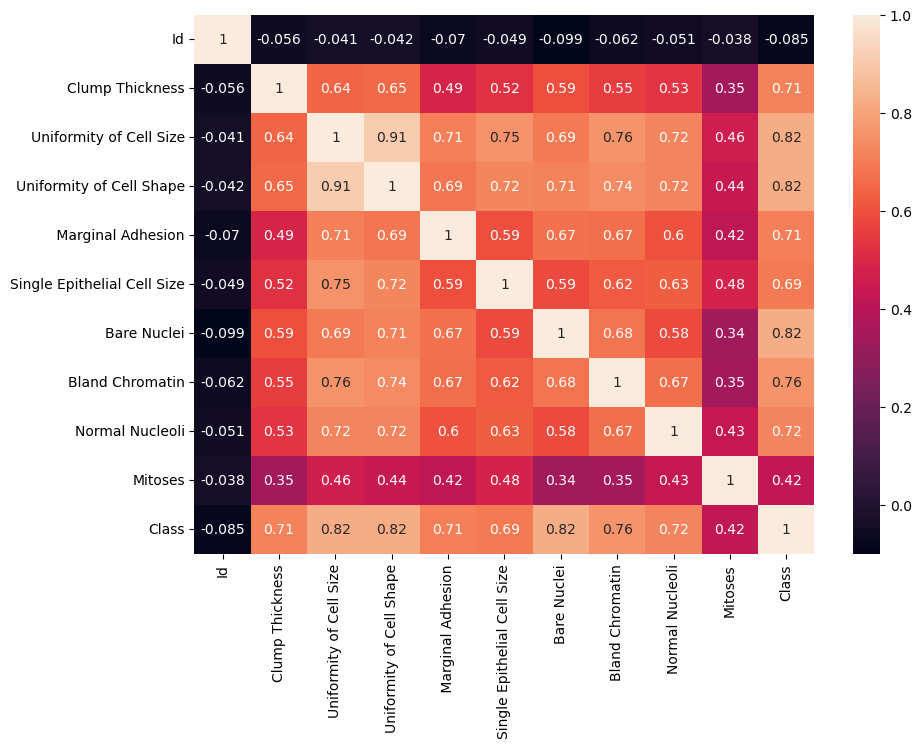

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

<Axes: >

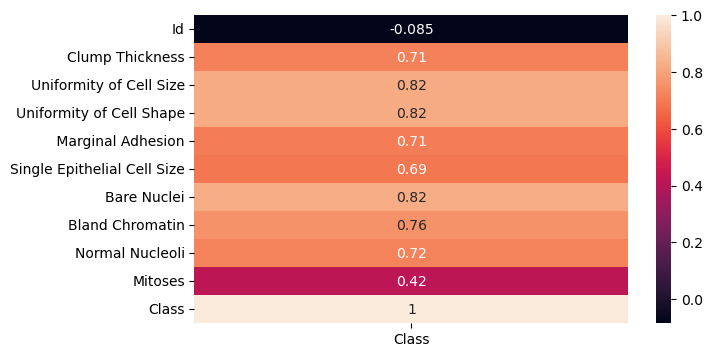

In [8]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr()[['Class']], annot=True)

In [9]:
X =df.drop(['Class','Id'],axis=1)
y=df['Class']

#### Split Data in Train/Test for X and y


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1099)


#### Scaler


In [11]:
scale = StandardScaler()
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.transform(X_test)

### Model

#### Create Model(s)

In [12]:
model = LogisticRegressionCV(
    Cs=10,
    cv=5,
    penalty='l2',
    scoring='f1',
    solver='liblinear',#small dataset
    multi_class='ovr',#binary problem
    random_state=1099,
    )

#### Train Model

In [13]:
model.fit(scaled_X_train,y_train)

LogisticRegressionCV(cv=5, multi_class='ovr', random_state=1099, scoring='f1',
                     solver='liblinear')

### Evaluate model

#### Test On data

In [14]:
y_pred=model.predict(scaled_X_test)
y_pred


array([4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 4, 2])

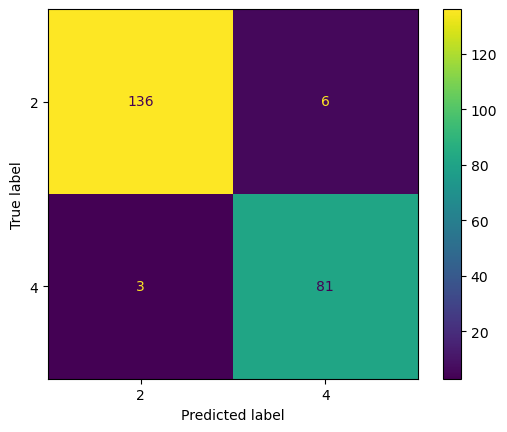

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=model.classes_).plot()

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       142
           4       0.93      0.96      0.95        84

    accuracy                           0.96       226
   macro avg       0.95      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



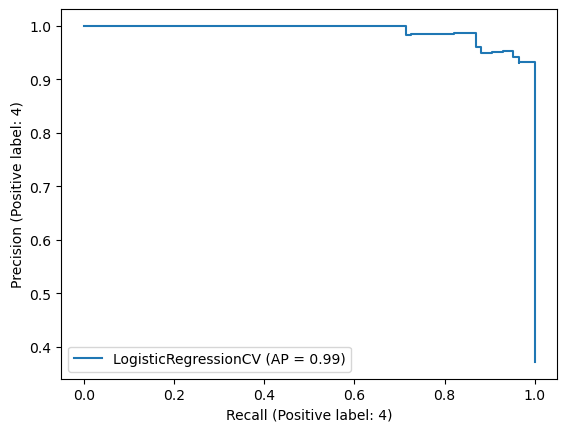

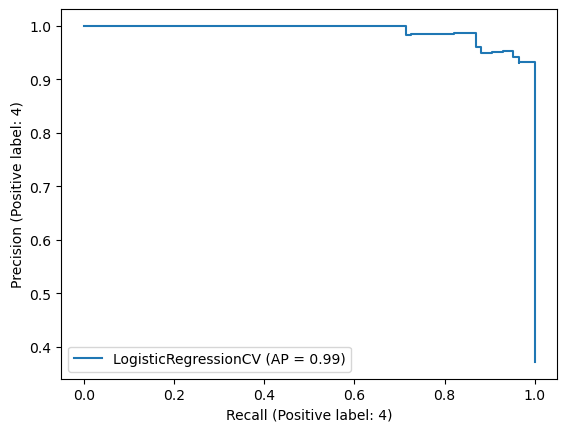

In [21]:
PrecisionRecallDisplay.from_estimator(estimator=model,X=scaled_X_test,y=y_test).plot()

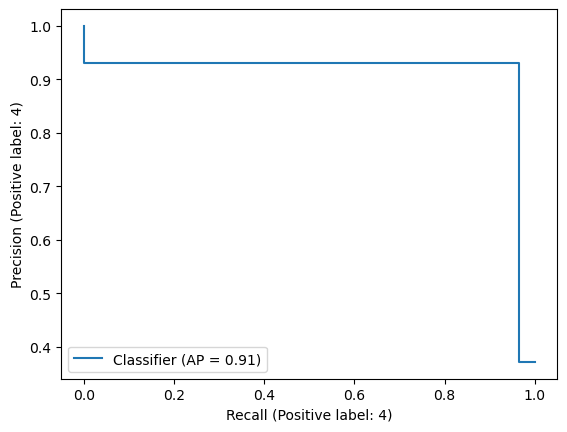

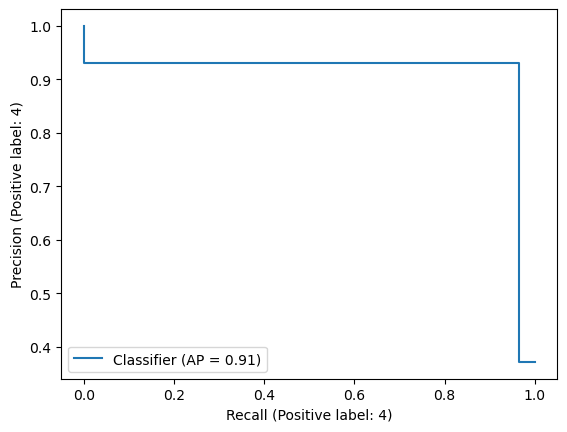

In [19]:
PrecisionRecallDisplay.from_predictions(y_test,y_pred,pos_label=4).plot()

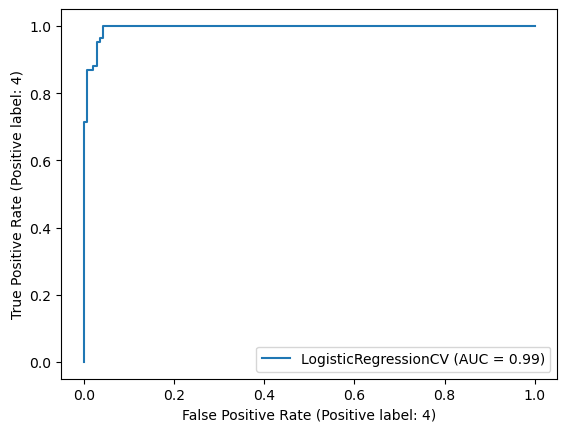

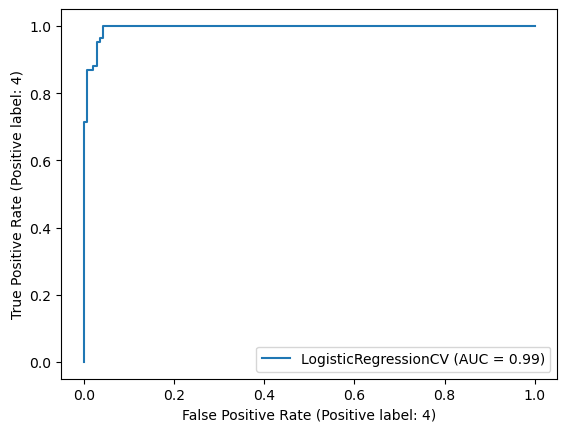

In [23]:
RocCurveDisplay.from_estimator(estimator=model,X=scaled_X_test,y=y_test).plot()

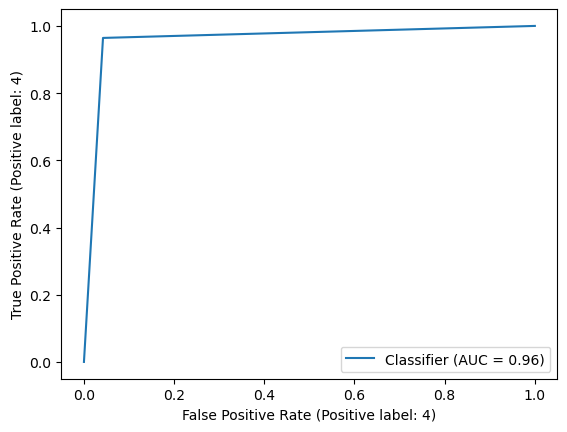

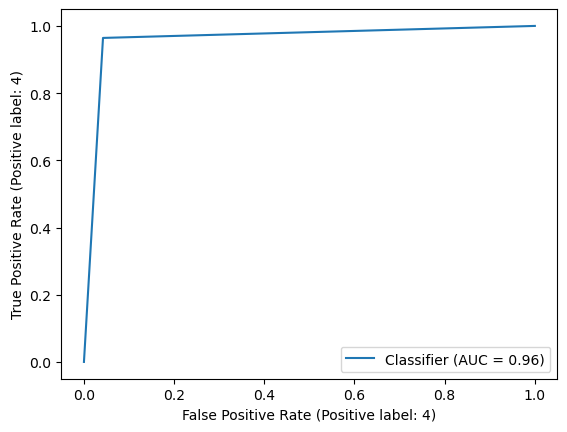

In [24]:
RocCurveDisplay.from_predictions(y_test,y_pred,pos_label=4).plot()

### Final Model(s)


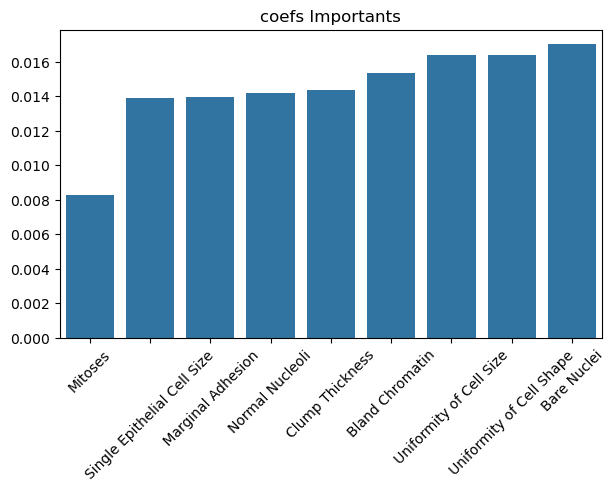

In [25]:
coef = model.coef_[0]
coef = pd.Series(index=X.columns,data=coef)
coef = coef.sort_values()
c_value = model.C_
plt.figure(figsize=(7,4))
sns.barplot(data=coef,)
plt.title('coefs Importants')
plt.xticks(rotation=45);


#### Train on all Data 
##### No need!


#### Save with joblib

In [ ]:
#import joblib
#joblib.dump(model,'final_model.pickle')

# Congratulations!!!

#### Created and trained by  Matin1099.
